<a href="https://colab.research.google.com/github/sudhirk999/O4thLab/blob/master/MP_Neuron_and_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [0]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
## Converting the data into the pandas dataframe

data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [0]:
## Including the target class in the data frame
data['target class'] = cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
## Number of classes in the cancer datasets
data['target class'].value_counts()

1    357
0    212
Name: target class, dtype: int64

In [0]:
## from here we get that the malignant are more than the benign

# Spliting the data

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X = data.drop('target class', axis=1)
y = data['target class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=1, stratify=y)

Using stratify=y now all the train and test have the same no. of  malignant and benign ratio

# MP Neuron model

MP Neuron model takes the input in binary form

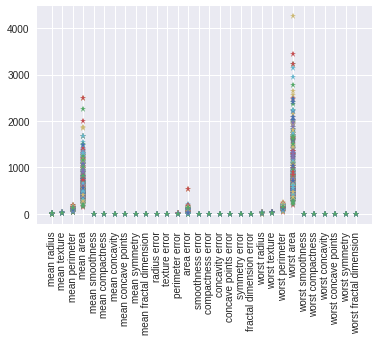

In [15]:
## Ploting the datasets

plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
data.loc[:,['mean area', 'target class']].groupby('target class').mean()

,mean area
target class,
0,978.376415
1,462.790196


In [0]:
## Here we find the value of the mean area of benign is approx 980 and the malignant is approx 470

In [0]:
X_binarised_train = X_train['mean area'].map(lambda x: 1 if x < 1000 else 0)

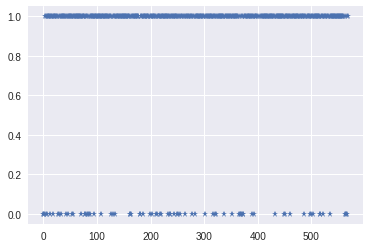

In [20]:
plt.plot(X_binarised_train, '*')

In [0]:
## BInarizing all the features of the train and test data

In [22]:
data.groupby('target class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Since we find the benign(0) has larger fearures value than malignant(1) hence we will use the labels=[1,0]

In [0]:
X_train_binarised = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [0]:
X_test_binarised = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [25]:
type(X_test_binarised)

pandas.core.frame.DataFrame

In [0]:
X_test_binarised = X_test_binarised.values
X_train_binarised = X_train_binarised.values

In [27]:
type(X_test_binarised)

numpy.ndarray

In [0]:
## MP Neuron Model

In [0]:
from random import randint

In [30]:
b = 3

i = randint(0, X_train_binarised.shape[0])

print('For row', i)

if (np.sum(X_train_binarised[i, :]) >= b):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')
  
if (y_train[i] == 1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')


For row 144
MP Neuron inference is malignant
Ground truth is malignant


In [31]:
b =3

accuracy = []
acc_count = 0
 
for x, y in zip(X_train_binarised, y_train):
  y_pred = (np.sum(x) >= b)
  accuracy.append(y_pred)
  if y == y_pred:
    acc_count += 1
    
    
print(acc_count, acc_count / X_train_binarised.shape[0])

321 0.626953125


In [0]:
# The accuracy is very less hench we will havw to considered differnt values of b(threshold values)

In [33]:
x_ = []
y_ = []
for b in range(X_train_binarised.shape[1]):
  accuracy = []
  acc_count = 0

  for x, y in zip(X_train_binarised, y_train):
    y_pred = (np.sum(x) >= b)
    accuracy.append(y_pred)
    if y == y_pred:
      acc_count += 1
  
  x_.append(b)
  acc = acc_count / X_train_binarised.shape[0]
  y_.append(acc)
  print(b, acc)

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125


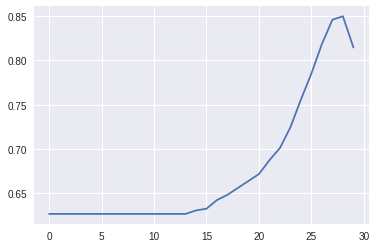

In [34]:
plt.plot(x_, y_)

In [0]:
## The highest accuracy is at b = 28

In [0]:
## CREATING THE CLASS FOR THE MPNEURON

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
class MPNeuron():
  def __init__(self):
    self.b = None
    
  def model(self,x):
    return 1 if np.sum(x) >= self.b else 0
  
  def predict(self,X):
    y = []
    for x in X:
      y.append(self.model(x))
    return np.array(y)
    
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1]):
      self.b = b
      y_pred = self.predict(X)
      accuracy[b] = accuracy_score(y_pred, Y)
      
    best_b = max(accuracy, key=accuracy.get)
    self.b = best_b
    
    print('Optimal value if b is: ', best_b)
    print('Highest accuracy is: ', accuracy[best_b])

In [0]:
mp_neuron = MPNeuron()

In [40]:
mp_neuron.fit(X_train_binarised, y_train)

Optimal value if b is:  28
Highest accuracy is:  0.849609375


In [0]:
y_test_pred = mp_neuron.predict(X_test_binarised)

In [42]:
accuracy_score(y_test_pred, y_test)

0.7894736842105263

# Perceptron Model

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y = o, \mbox{otherwise}$

In [0]:
class Perceptron():
  def __init__(self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if np.dot(self.w, x) >= self.b else 0
  
  def predict(self, X):
    y = []
    for x in X:
      y.append(self.model(x))
      
    return y
  
  def fit(self, X, Y, epochs=2, lr=1):
    self.w = np.random.randn(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        
        if y == 1 and y_pred == 0:
          self.w += lr * x
          self.b += lr * 1
          
        elif y == 0 and y_pred == 1:
          self.w -= lr * x
          self.b -= lr * 1
    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if accuracy[i] > max_accuracy:
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    
    self.w = chkptw
    self.b = chkptb
    
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()

In [0]:
perceptron = Perceptron()

In [0]:
X_train = X_train.values
X_test = X_test.values

0.9453125


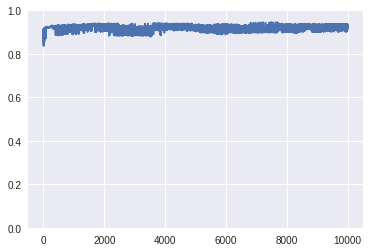

In [50]:
perceptron.fit(X_train, y_train, epochs=10000, lr=0.0001)

In [51]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, y_test))

0.8947368421052632
